In [11]:

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# Import data

In [7]:
df1 = pd.read_csv(r"//////", sep=';')

In [13]:
df2 = pd.read_csv(r"//////", sep=';')

In [15]:
df3 = pd.read_csv(r"//////", sep=';')

In [17]:
df4 = pd.read_csv(r"//////", sep=';')

In [19]:
df5 = pd.read_csv(r"//////", sep=';')

In [21]:
df6 = pd.read_csv(r"//////", sep=';')

In [24]:
#Make one frame
df = pd.concat([
    df1,
    df2,
    df3,
    df4,
    df5,
    df6
])

In [10]:
#copy dataframe
new_df = df

# Working with data

In [11]:
#drop duplicates
new_df = new_df[new_df['OrderLineNumber'] == 1].drop_duplicates(subset='OrderIdsMindboxId')

In [12]:
#remove "Canceled" values
new_df = new_df[new_df['OrderLineStatusIdsExternalId'] !='Canceled'] 

In [ ]:

# convert the OrderTotalPrice column in the DataFrame new_df from string 
# format to floating point number format.
new_df['OrderTotalPrice'] = new_df['OrderTotalPrice'].astype(str)
new_df['OrderTotalPrice'] = new_df['OrderTotalPrice'].str.replace(',', '.')
new_df['OrderTotalPrice'] = new_df['OrderTotalPrice'].astype('float')

In [14]:
new_df['OrderTotalPrice'].sum()

12743977359.230007

In [15]:
# transform to type time
new_df['OrderFirstActionDateTimeUtc'] = pd.to_datetime(new_df['OrderFirstActionDateTimeUtc'])

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4588812 entries, 0 to 343344
Data columns (total 48 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   OrderIdsMindboxId                     int64         
 1   OrderFirstActionIdsMindboxId          int64         
 2   OrderFirstActionDateTimeUtc           datetime64[ns]
 3   OrderFirstActionChannelIdsMindboxId   int64         
 4   OrderFirstActionChannelIdsExternalId  object        
 5   OrderFirstActionChannelName           object        
 6   OrderAreaIdsExternalId                float64       
 7   OrderDeliveryCost                     object        
 8   OrderTotalPrice                       float64       
 9   OrderIdsDigitalRestId                 object        
 10  OrderIdsOmsId                         float64       
 11  OrderCustomFieldsAmountToChange       float64       
 12  OrderCustomFieldsASAP                 object        
 13  OrderCustomFieldsC

# Start with cohort analysis

In [17]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x): return dt.datetime(x.year, x.month, 1) 

# Create transaction_date column based on month and store in TransactionMonth
new_df['TransactionMonth'] = new_df['OrderFirstActionDateTimeUtc'].apply(get_month) 

# Grouping by customer_id and select the InvoiceMonth value
grouping = new_df.groupby('OrderCustomerIdsMindboxId')['TransactionMonth'] 

# Assigning a minimum InvoiceMonth value to the dataset
new_df['CohortMonth'] = grouping.transform('min')

# printing top 5 rows
new_df.head()

,OrderIdsMindboxId,OrderFirstActionIdsMindboxId,OrderFirstActionDateTimeUtc,OrderFirstActionChannelIdsMindboxId,OrderFirstActionChannelIdsExternalId,OrderFirstActionChannelName,OrderAreaIdsExternalId,OrderDeliveryCost,OrderTotalPrice,OrderIdsDigitalRestId,...,OrderLineId,OrderLineCustomFieldsGift,OrderLineCustomFieldsOptions,OrderCustomerIdsDeviceUUID,OrderCustomerIdsMindboxId,OrderCustomerEmail,OrderCustomerMobilePhone,OrderCustomerPendingEmail,TransactionMonth,CohortMonth
0,2,244456,2023-06-02 15:19:00,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01
1,3,248456,2023-06-02 15:24:53,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01
2,5,5916222,2023-06-05 05:29:55,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01
3,4,5916456,2023-06-05 05:25:54,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01
4,7,5920222,2023-06-05 05:33:41,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01


In [18]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [19]:
# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(new_df, 'TransactionMonth')

# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(new_df, 'CohortMonth')

In [20]:
new_df

,OrderIdsMindboxId,OrderFirstActionIdsMindboxId,OrderFirstActionDateTimeUtc,OrderFirstActionChannelIdsMindboxId,OrderFirstActionChannelIdsExternalId,OrderFirstActionChannelName,OrderAreaIdsExternalId,OrderDeliveryCost,OrderTotalPrice,OrderIdsDigitalRestId,...,OrderLineId,OrderLineCustomFieldsGift,OrderLineCustomFieldsOptions,OrderCustomerIdsDeviceUUID,OrderCustomerIdsMindboxId,OrderCustomerEmail,OrderCustomerMobilePhone,OrderCustomerPendingEmail,TransactionMonth,CohortMonth
0,2,244456,2023-06-02 15:19:00,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01
1,3,248456,2023-06-02 15:24:53,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01
2,5,5916222,2023-06-05 05:29:55,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01
3,4,5916456,2023-06-05 05:25:54,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01
4,7,5920222,2023-06-05 05:33:41,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343298,16920573,1493762637,2024-03-24 18:24:17,271,msk.TANUKI.RF.Mobile,msk.TANUKI.RF.Mobile,33722.0,79,5307.0,NaN,...,NaN,False,NaN,NaN,661067,dupidu@yandex.ru,7.903793e+10,NaN,2024-03-01,2023-12-01
343306,16917555,1493215311,2024-03-24 16:07:02,271,msk.TANUKI.RF.Mobile,msk.TANUKI.RF.Mobile,33737.0,79,2071.0,NaN,...,NaN,False,NaN,NaN,6604673,NaN,7.915030e+10,NaN,2024-03-01,2024-03-01
343331,16903260,1488919561,2024-03-23 18:10:02,271,msk.TANUKI.RF.Mobile,msk.TANUKI.RF.Mobile,33719.0,79,1704.0,NaN,...,NaN,False,NaN,NaN,3196876,Meeel@ya.ru,7.963977e+10,NaN,2024-03-01,2023-03-01
343335,16902753,1488853075,2024-03-23 18:00:13,271,msk.TANUKI.RF.Mobile,msk.TANUKI.RF.Mobile,33719.0,79,1284.0,NaN,...,NaN,False,NaN,NaN,3196876,Meeel@ya.ru,7.963977e+10,NaN,2024-03-01,2023-03-01


In [21]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year

# Calculate difference in months
months_diff = transaction_month - cohort_month


""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation. 
 """

new_df['CohortIndex'] = years_diff * 12 + months_diff  + 1 
new_df.head(5)

,OrderIdsMindboxId,OrderFirstActionIdsMindboxId,OrderFirstActionDateTimeUtc,OrderFirstActionChannelIdsMindboxId,OrderFirstActionChannelIdsExternalId,OrderFirstActionChannelName,OrderAreaIdsExternalId,OrderDeliveryCost,OrderTotalPrice,OrderIdsDigitalRestId,...,OrderLineCustomFieldsGift,OrderLineCustomFieldsOptions,OrderCustomerIdsDeviceUUID,OrderCustomerIdsMindboxId,OrderCustomerEmail,OrderCustomerMobilePhone,OrderCustomerPendingEmail,TransactionMonth,CohortMonth,CohortIndex
0,2,244456,2023-06-02 15:19:00,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01,4
1,3,248456,2023-06-02 15:24:53,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01,4
2,5,5916222,2023-06-05 05:29:55,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01,4
3,4,5916456,2023-06-05 05:25:54,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01,4
4,7,5920222,2023-06-05 05:33:41,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01,4


In [22]:
# Counting daily active user from each chort
grouping = new_df.groupby(['CohortMonth', 'CohortIndex'])



# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['OrderCustomerIdsMindboxId'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()


 # Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'OrderCustomerIdsMindboxId')

# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,OrderCustomerIdsMindboxId
0,2023-03-01,1,216364
1,2023-03-01,2,83091
2,2023-03-01,3,79685
3,2023-03-01,4,73477
4,2023-03-01,5,74871


In [23]:
cohort_counts.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2023-03-01,216364.0,83091.0,79685.0,73477.0,74871.0,72604.0,75926.0,77371.0,74431.0,77925.0,75568.0,71596.0,65702.0
2023-04-01,95563.0,25946.0,23633.0,24466.0,23627.0,24632.0,25212.0,24089.0,25638.0,24840.0,23034.0,19803.0,NaN
2023-05-01,73341.0,15789.0,16547.0,15400.0,15875.0,16294.0,15636.0,16442.0,16194.0,14829.0,12809.0,NaN,NaN
2023-06-01,63824.0,14056.0,12803.0,12685.0,12655.0,12254.0,13098.0,12703.0,11870.0,10072.0,NaN,NaN,NaN
2023-07-01,90409.0,18682.0,17175.0,16652.0,15846.0,16691.0,16780.0,15523.0,13238.0,NaN,NaN,NaN,NaN
2023-08-01,79163.0,14270.0,13007.0,12447.0,12940.0,12719.0,12090.0,10131.0,NaN,NaN,NaN,NaN,NaN
2023-09-01,76402.0,13473.0,12064.0,12434.0,12234.0,11656.0,9944.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,75048.0,13137.0,12780.0,11865.0,11001.0,9257.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,71006.0,12605.0,11320.0,10485.0,8753.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cohort_sizes = cohort_counts.iloc[:,0]

In [25]:
cohort_sizes

CohortMonth
2023-03-01    216364.0
2023-04-01     95563.0
2023-05-01     73341.0
2023-06-01     63824.0
2023-07-01     90409.0
2023-08-01     79163.0
2023-09-01     76402.0
2023-10-01     75048.0
2023-11-01     71006.0
2023-12-01     74494.0
2024-01-01     67192.0
2024-02-01     64685.0
2024-03-01     52072.0
Name: 1, dtype: float64

In [26]:
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [27]:
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2023-03-01,100.0,38.4,36.8,34.0,34.6,33.6,35.1,35.8,34.4,36.0,34.9,33.1,30.4
2023-04-01,100.0,27.2,24.7,25.6,24.7,25.8,26.4,25.2,26.8,26.0,24.1,20.7,NaN
2023-05-01,100.0,21.5,22.6,21.0,21.6,22.2,21.3,22.4,22.1,20.2,17.5,NaN,NaN
2023-06-01,100.0,22.0,20.1,19.9,19.8,19.2,20.5,19.9,18.6,15.8,NaN,NaN,NaN
2023-07-01,100.0,20.7,19.0,18.4,17.5,18.5,18.6,17.2,14.6,NaN,NaN,NaN,NaN
2023-08-01,100.0,18.0,16.4,15.7,16.3,16.1,15.3,12.8,NaN,NaN,NaN,NaN,NaN
2023-09-01,100.0,17.6,15.8,16.3,16.0,15.3,13.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,100.0,17.5,17.0,15.8,14.7,12.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,100.0,17.8,15.9,14.8,12.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08',
       '2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02',
       '2024-03'],
      dtype='object', name='CohortMonth')

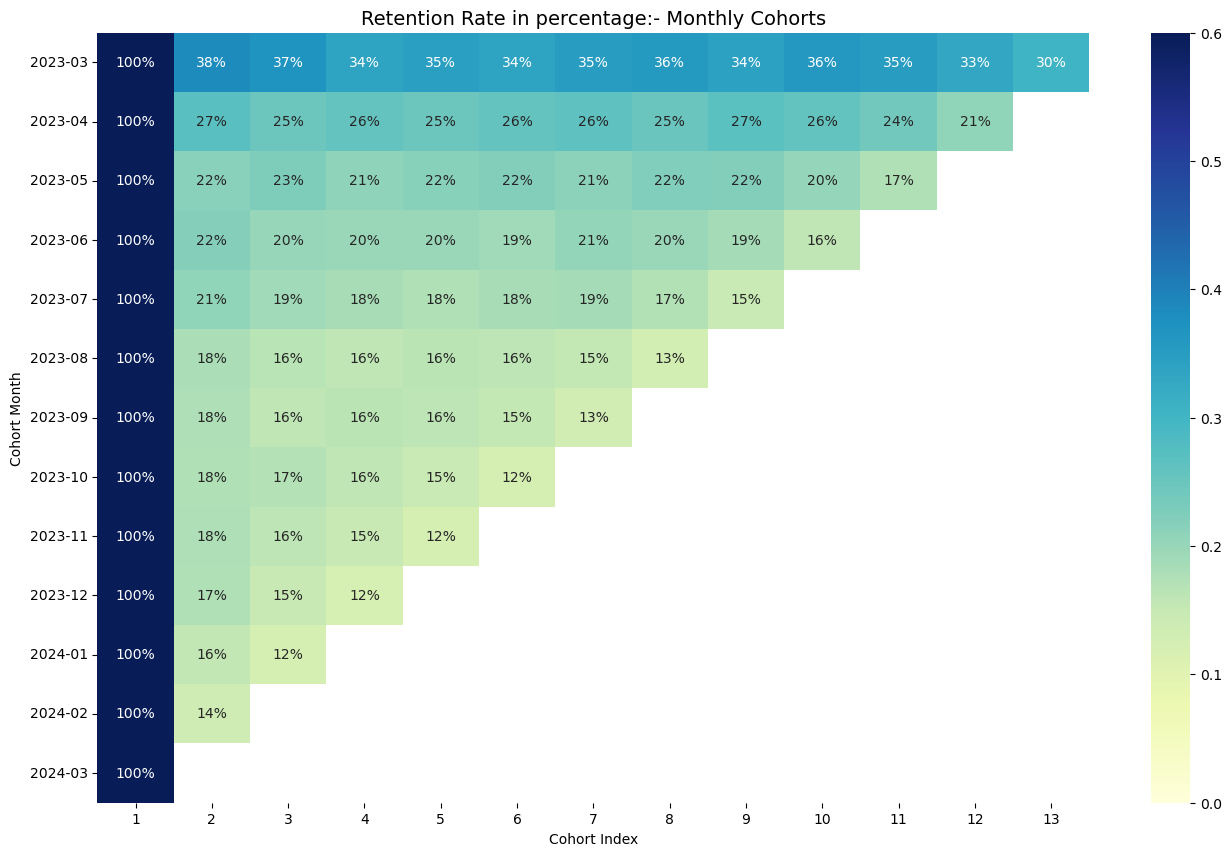

In [29]:
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Retention Rate in percentage:- Monthly Cohorts', fontsize = 14)

# Creating the seaborn based heatmap
sns.heatmap(retention, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='horizontal')
plt.show()

## Key observations:

- Gradual decline in retention: The initial cohort is always 100%, which makes sense since all users are active in the first month. However, with each subsequent month, customer retention drops significantly. For example, the March 2023 cohort starts with 100%, but after a month it loses 62% of users, and by the 13th month, retention is only 30%.

- Sharp drop in retention in recent cohorts: While the March 2023 cohort shows relatively high rates (30% of users remain active after a year), later cohorts (e.g. September-November 2023) show a sharp decline in the first few months (15-18%).

- Decreasing trend: It is clear that the later the cohort (e.g. October-December 2023), the more customers it loses. This may indicate that the product is either losing relevance to users or that more effective retention strategies are needed.

- Signs for intervention: The data shows a consistent pattern of customer loss, especially after the second month. If the trends continue, the business may need to rethink its retention strategy, such as improving the user experience, loyalty programs, or increasing support.

## Recommendations:

Analyze the reasons for churn: It’s worth conducting additional research to understand why users are churn, especially after the first or second month.
Optimize retention of new customers: You can focus on improving the first months of use of the product to retain more users for a longer period.
Launch loyalty programs: Strategies aimed at rewarding repeat customers can help improve retention in the long term.

# LTV

In [34]:
ltv = new_df

In [37]:
ltv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4588812 entries, 0 to 343344
Data columns (total 51 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   OrderIdsMindboxId                     int64         
 1   OrderFirstActionIdsMindboxId          int64         
 2   OrderFirstActionDateTimeUtc           datetime64[ns]
 3   OrderFirstActionChannelIdsMindboxId   int64         
 4   OrderFirstActionChannelIdsExternalId  object        
 5   OrderFirstActionChannelName           object        
 6   OrderAreaIdsExternalId                float64       
 7   OrderDeliveryCost                     object        
 8   OrderTotalPrice                       float64       
 9   OrderIdsDigitalRestId                 object        
 10  OrderIdsOmsId                         float64       
 11  OrderCustomFieldsAmountToChange       float64       
 12  OrderCustomFieldsASAP                 object        
 13  OrderCustomFieldsC

In [36]:
ltv.head()

,OrderIdsMindboxId,OrderFirstActionIdsMindboxId,OrderFirstActionDateTimeUtc,OrderFirstActionChannelIdsMindboxId,OrderFirstActionChannelIdsExternalId,OrderFirstActionChannelName,OrderAreaIdsExternalId,OrderDeliveryCost,OrderTotalPrice,OrderIdsDigitalRestId,...,OrderLineCustomFieldsGift,OrderLineCustomFieldsOptions,OrderCustomerIdsDeviceUUID,OrderCustomerIdsMindboxId,OrderCustomerEmail,OrderCustomerMobilePhone,OrderCustomerPendingEmail,TransactionMonth,CohortMonth,CohortIndex
0,2,244456,2023-06-02 15:19:00,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01,4
1,3,248456,2023-06-02 15:24:53,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01,4
2,5,5916222,2023-06-05 05:29:55,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01,4
3,4,5916456,2023-06-05 05:25:54,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01,4
4,7,5920222,2023-06-05 05:33:41,52,128,128,NaN,NaN,380.0,NaN,...,NaN,NaN,NaN,15,NaN,7.555111e+10,NaN,2023-06-01,2023-03-01,4


In [38]:
ltv = ltv[['OrderIdsMindboxId','OrderTotalPrice','OrderFirstActionDateTimeUtc','OrderCustomerIdsMindboxId']]

In [39]:
ltv

,OrderIdsMindboxId,OrderTotalPrice,OrderFirstActionDateTimeUtc,OrderCustomerIdsMindboxId
0,2,380.0,2023-06-02 15:19:00,15
1,3,380.0,2023-06-02 15:24:53,15
2,5,380.0,2023-06-05 05:29:55,15
3,4,380.0,2023-06-05 05:25:54,15
4,7,380.0,2023-06-05 05:33:41,15
...,...,...,...,...
343298,16920573,5307.0,2024-03-24 18:24:17,661067
343306,16917555,2071.0,2024-03-24 16:07:02,6604673
343331,16903260,1704.0,2024-03-23 18:10:02,3196876
343335,16902753,1284.0,2024-03-23 18:00:13,3196876


In [ ]:
# Function that will parse the date. Time-based cohort: 1 day of the month.
def get_month(x): return dt.datetime(x.year, x.month, 1) 

# Create a column "Purchase Month" based on the month and save it to Purchase Month.
ltv['МесПокупки'] = ltv['OrderFirstActionDateTimeUtc'].apply(get_month) 

# Group by customer_id and select the InvoiceMonth value.
grouping = ltv.groupby('OrderCustomerIdsMindboxId')['МесПокупки'] 

# Assign the minimum InvoiceMonth value to the dataset
ltv['МесКагорты'] = grouping.transform('min')

# принтим
ltv.head()

In [43]:
first_orders = ltv.groupby('OrderCustomerIdsMindboxId').agg({'МесПокупки': 'min'}).reset_index()
first_orders.columns = ['OrderCustomerIdsMindboxId', 'first_order_month']
print(first_orders.head())

   OrderCustomerIdsMindboxId first_order_month
0                          7        2023-03-01
1                          8        2023-04-01
2                          9        2023-05-01
3                         10        2023-03-01
4                         11        2023-03-01


In [44]:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'OrderCustomerIdsMindboxId': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes.head()) 

  first_order_month  n_buyers
0        2023-03-01    216364
1        2023-04-01     95563
2        2023-05-01     73341
3        2023-06-01     63824
4        2023-07-01     90409


In [46]:
orders_new = pd.merge(ltv,first_orders, on='OrderCustomerIdsMindboxId')

   OrderIdsMindboxId  OrderTotalPrice OrderFirstActionDateTimeUtc  \
0                  2            380.0         2023-06-02 15:19:00   
1                  3            380.0         2023-06-02 15:24:53   
2                  5            380.0         2023-06-05 05:29:55   
3                  4            380.0         2023-06-05 05:25:54   
4                  7            380.0         2023-06-05 05:33:41   

   OrderCustomerIdsMindboxId МесПокупки МесКагорты first_order_month  
0                         15 2023-06-01 2023-03-01        2023-03-01  
1                         15 2023-06-01 2023-03-01        2023-03-01  
2                         15 2023-06-01 2023-03-01        2023-03-01  
3                         15 2023-06-01 2023-03-01        2023-03-01  
4                         15 2023-06-01 2023-03-01        2023-03-01  


In [47]:
orders_new.head()

,OrderIdsMindboxId,OrderTotalPrice,OrderFirstActionDateTimeUtc,OrderCustomerIdsMindboxId,МесПокупки,МесКагорты,first_order_month
0,2,380.0,2023-06-02 15:19:00,15,2023-06-01,2023-03-01,2023-03-01
1,3,380.0,2023-06-02 15:24:53,15,2023-06-01,2023-03-01,2023-03-01
2,5,380.0,2023-06-05 05:29:55,15,2023-06-01,2023-03-01,2023-03-01
3,4,380.0,2023-06-05 05:25:54,15,2023-06-01,2023-03-01,2023-03-01
4,7,380.0,2023-06-05 05:33:41,15,2023-06-01,2023-03-01,2023-03-01


In [49]:
cohorts = (
    orders_new.groupby(['first_order_month', 'МесПокупки'])
    .agg({'OrderTotalPrice': 'sum'})
    .reset_index()
)
cohorts.head()

,first_order_month,МесПокупки,OrderTotalPrice
0,2023-03-01,2023-03-01,1.151080e+09
1,2023-03-01,2023-04-01,4.561205e+08
2,2023-03-01,2023-05-01,4.491984e+08
3,2023-03-01,2023-06-01,3.571117e+08
4,2023-03-01,2023-07-01,3.226184e+08


In [50]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
print(report.head()) 

  first_order_month  n_buyers МесПокупки  OrderTotalPrice
0        2023-03-01    216364 2023-03-01     1.151080e+09
1        2023-03-01    216364 2023-04-01     4.561205e+08
2        2023-03-01    216364 2023-05-01     4.491984e+08
3        2023-03-01    216364 2023-06-01     3.571117e+08
4        2023-03-01    216364 2023-07-01     3.226184e+08


In [51]:
report['age'] = (
    report['МесПокупки'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
print(report.head()) 

  first_order_month  n_buyers МесПокупки  OrderTotalPrice  age
0        2023-03-01    216364 2023-03-01     1.151080e+09    0
1        2023-03-01    216364 2023-04-01     4.561205e+08    1
2        2023-03-01    216364 2023-05-01     4.491984e+08    2
3        2023-03-01    216364 2023-06-01     3.571117e+08    3
4        2023-03-01    216364 2023-07-01     3.226184e+08    4


In [52]:
report['ltv'] = report['OrderTotalPrice'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round()

output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11,12
first_order_month,,,,,,,,,,,,,
2023-03-01,5320.0,2108.0,2076.0,1651.0,1491.0,1431.0,1519.0,1576.0,1499.0,1718.0,1595.0,1542.0,1394.0
2023-04-01,4448.0,1339.0,1042.0,981.0,948.0,978.0,1001.0,962.0,1111.0,1049.0,1004.0,845.0,
2023-05-01,4783.0,1070.0,859.0,788.0,806.0,829.0,793.0,901.0,876.0,823.0,708.0,,
2023-06-01,3882.0,857.0,756.0,737.0,742.0,722.0,841.0,797.0,764.0,641.0,,,
2023-07-01,4267.0,919.0,765.0,732.0,696.0,785.0,787.0,747.0,620.0,,,,
2023-08-01,3576.0,698.0,634.0,606.0,673.0,652.0,636.0,529.0,,,,,
2023-09-01,3441.0,662.0,604.0,653.0,637.0,620.0,530.0,,,,,,
2023-10-01,3362.0,656.0,682.0,620.0,580.0,491.0,,,,,,,
2023-11-01,3350.0,712.0,630.0,585.0,484.0,,,,,,,,


In [54]:
ltv_202303 = output.loc['2023-03-01'].sum()
print(ltv_202303) 

24920.0


In [56]:
ltv_202308 = output.loc['2023-08-01'].sum()
print(ltv_202308) 

8004.0


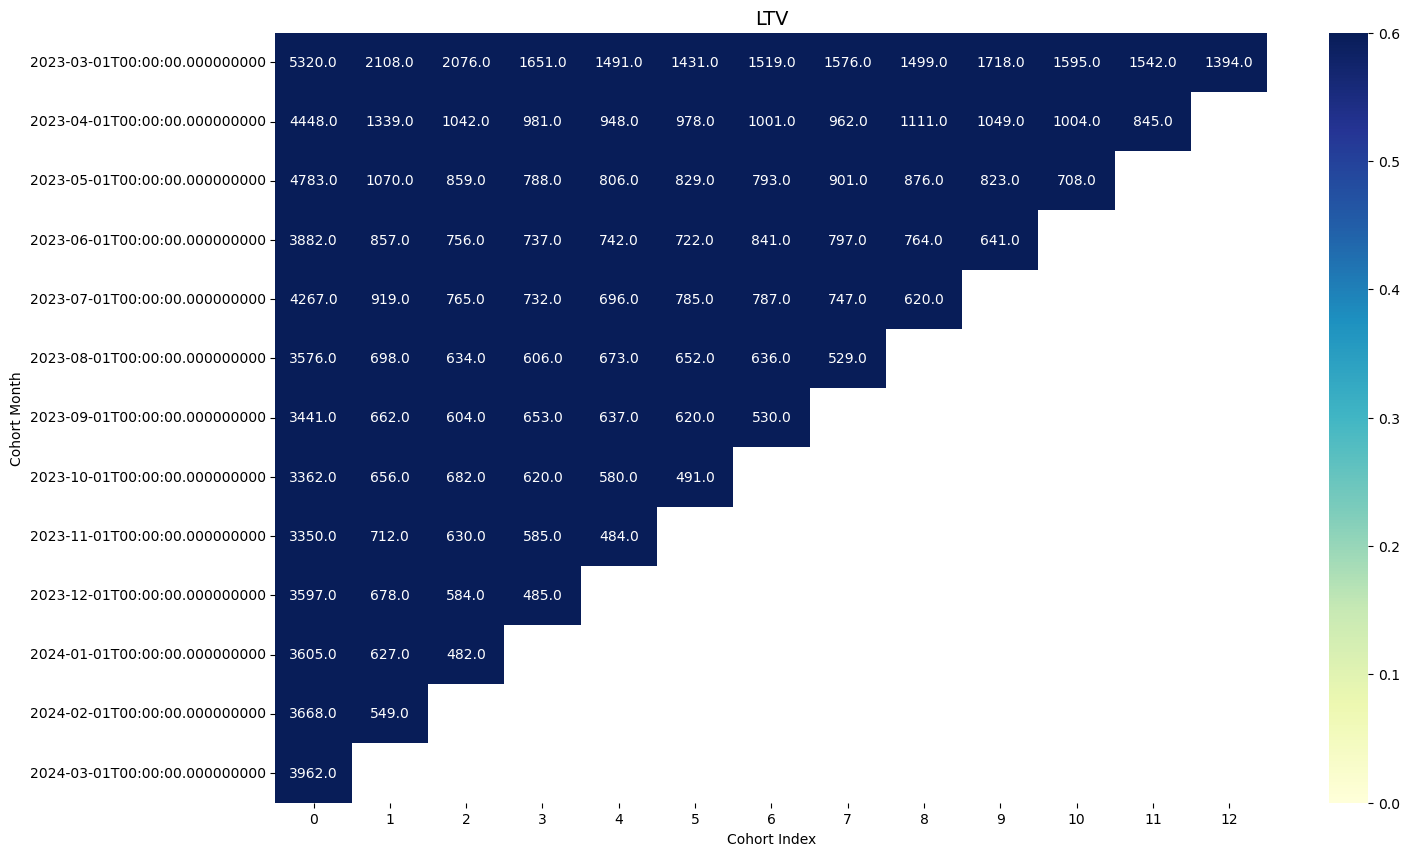

In [58]:
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('LTV', fontsize = 14)

# Creating the seaborn based heatmap
sns.heatmap(output, annot=True, fmt= '',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='horizontal')
plt.show()

## Key points:

### Revenue Decline Over Time:
- Most cohorts show a steep revenue decline in the first few months, which is expected as initial customer interest or activity fades over time.
- For example, the March 2023 cohort started with 5,320, but by month 12, revenue had already declined to 1,394.
Later cohorts (e.g. October and later) have not yet reached significant ages, but we see similar behavior - revenue decline after 1-2 months.

### March 2023 cohort:
- This is the oldest cohort with a full 13 months of observation. It can be said to be generating revenue at a stable level after 4-5 months, but we still see a decline by month 12 (1,394). It is important for assessing LTV, as it includes more data on customer behavior.

### Revenue Decline for Newer Cohorts:
- The April and later cohorts are already generating less revenue in the first months compared to March. For example, the April 2023 cohort started with 4448 and dropped to 1042 by month 2, while the March cohort showed 2108 in month 2. This could indicate a decrease in the quality of new customers or a less effective acquisition strategy.

### Declining LTV trend:
- Cohorts from May 2023 onwards show lower starting revenue and a faster decline. For example, the June cohort started with 3882 and dropped to 641 by month 9, which is much faster than the March cohort.

### Seasonality and revenue impact:
- There may be a seasonal impact (such as a more active March or summer) that affects how much revenue customers bring in based on the month of their first purchase. This could be explored in more detail.

## Rough LTV insights:

- The LTV for each cohort can be calculated as the sum of all revenue generated from customers within each month after their first purchase. - For example, for March 2023, the LTV for month 13 is the sum of all values ​​in the series: 5320 + 2108 + 2076 + ... + 1394.
- Declining LTV: Each subsequent cohort brings in less revenue compared to the previous ones, which may indicate that customers are losing interest in the product faster, or the quality of customers being acquired is declining.
- Need for action: Customer retention or acquisition strategies may need to be reconsidered, as the data shows an overall downward trend.